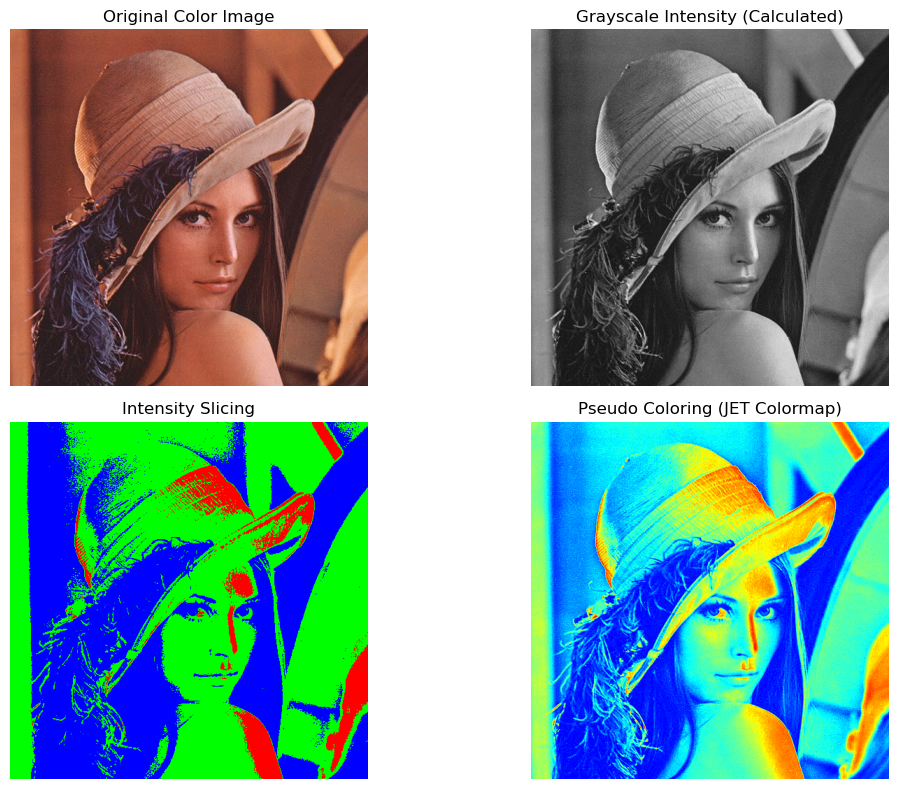

In [3]:
"""
This program demonstrates two techniques: **Intensity Slicing** and **Pseudo Coloring** applied to a color image.

### 1. Intensity Slicing:
Intensity slicing is a method used to highlight specific intensity ranges of an image. The intensity of an image is typically derived from the grayscale representation, where each pixel's intensity is calculated based on its RGB (Red, Green, Blue) values. 

The formula for calculating intensity is:
    Intensity = 0.299 * R + 0.587 * G + 0.114 * B
This formula is based on the standard luminance model, where:
    - R is the Red channel
    - G is the Green channel
    - B is the Blue channel
The constants (0.299, 0.587, 0.114) represent the relative contribution of each channel to human perception of brightness (luminance).

After calculating the intensity for each pixel, the image is classified into different intensity ranges, such as low, medium, and high. These ranges are then color-coded for visual enhancement. In this program:
    - Low intensity values (<= 85) are marked in **Blue**
    - Medium intensity values (86 <= value <= 170) are marked in **Green**
    - High intensity values (> 170) are marked in **Red**

This allows us to better visualize different regions of the image that have varying intensity levels.

### 2. Pseudo Coloring:
Pseudo coloring is a technique used to map grayscale intensity values into a color spectrum to make the variations in intensity more visually interpretable. It is especially useful when dealing with scientific data, where grayscale images may be difficult to differentiate, and pseudo coloring provides an intuitive color mapping that highlights intensity differences.

In this program, after calculating the grayscale intensity, a **pseudo-coloring technique** is applied using OpenCV's `cv2.applyColorMap()`. The colormap used here is **JET**, which is a commonly used color map where:
    - Low intensity values are represented in **Blue**
    - Mid-range intensity values in **Green/Yellow**
    - High intensity values in **Red**

This helps visualize intensity variations more effectively, making it easier to interpret the differences in pixel intensity in color.

### Key Points:
- **Intensity Slicing** helps highlight specific intensity ranges using color coding.
- **Pseudo Coloring** applies a color map to a grayscale image to enhance the visualization of intensity variations.
- The program uses both techniques to enhance the interpretability of image data based on intensity information.
- Visual output consists of:
  1. Original Color Image
  2. Grayscale Intensity Image (calculated using the luminance formula)
  3. Intensity Sliced Image (using color ranges for low, medium, and high intensities)
  4. Pseudo-Colored Image (using the JET colormap)

These techniques are commonly used in various image processing applications, such as medical imaging, remote sensing, and scientific data analysis, where analyzing intensity variations is crucial.

"""

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load a color image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'lena_color.jpg')
color_image = cv2.imread(image_path)

# Ensure the image is loaded successfully
if color_image is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Convert the image to RGB for better visualization in Matplotlib
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

# Calculate intensity using the formula
# Split the image into R, G, B channels
B, G, R = cv2.split(color_image)

# Calculate intensity using the formula: 0.299R + 0.587G + 0.114B
intensity = (0.299 * R + 0.587 * G + 0.114 * B).astype(np.uint8)

# Step 1: Intensity Slicing
# Create a blank RGB image for intensity slicing
height, width = intensity.shape
sliced_image = np.zeros((height, width, 3), dtype=np.uint8)

# Define intensity ranges and corresponding colors
for i in range(height):
    for j in range(width):
        value = intensity[i, j]
        if value <= 85:  # Low intensity
            sliced_image[i, j] = [255, 0, 0]  # Blue
        elif 86 <= value <= 170:  # Medium intensity
            sliced_image[i, j] = [0, 255, 0]  # Green
        else:  # High intensity
            sliced_image[i, j] = [0, 0, 255]  # Red

# Step 2: Pseudo Coloring (Applying colormap to the grayscale intensity)
# Convert the grayscale intensity to pseudo color using OpenCV colormap
pseudo_colored_image = cv2.applyColorMap(intensity, cv2.COLORMAP_JET)

# Step 3: Visualization
plt.figure(figsize=(12, 8))

# Original Color Image
plt.subplot(2, 2, 1)
plt.imshow(color_image_rgb)
plt.title("Original Color Image")
plt.axis("off")

# Grayscale Intensity
plt.subplot(2, 2, 2)
plt.imshow(intensity, cmap='gray')
plt.title("Grayscale Intensity (Calculated)")
plt.axis("off")

# Intensity Slicing Result
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(sliced_image, cv2.COLOR_BGR2RGB))
plt.title("Intensity Slicing")
plt.axis("off")

# Pseudo Color Result
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(pseudo_colored_image, cv2.COLOR_BGR2RGB))
plt.title("Pseudo Coloring (JET Colormap)")
plt.axis("off")

plt.tight_layout()
plt.show()
